In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the data

In [2]:
df_man = pd.read_parquet(r"..\data\final_processed\Manhattan - all.parquet.gz")
df_man = df_man.set_index("timestamp_hour")
df_man['txn_date'] = pd.to_datetime(df_man['txn_date'])
df_man = df_man[
    (df_man['txn_date'] >= '2019-02-01') & (df_man['txn_date'] <= '2024-12-31')
]
df_man['txn_month'] = df_man['txn_date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=1))
print(df_man.shape)
df_man.head()

(48936, 17)


,txn_date,txn_hour,num_txns_Yellow Taxi Trip Records,num_txns_For-Hire Vehicle Trip Records,num_txns_Green Taxi Trip Records,num_txns_Uber,num_txns_Lyft,num_txns_Juno,num_txns_Via,total_amount_Yellow Taxi Trip Records,total_amount_For-Hire Vehicle Trip Records,total_amount_Green Taxi Trip Records,total_amount_Uber,total_amount_Lyft,total_amount_Juno,total_amount_Via,txn_month
timestamp_hour,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2019-02-01,0,6347,109,212,12210,5261,1056,0,48891.282940,0.0,2738.758667,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 01:00:00,2019-02-01,1,3694,44,128,7286,3090,646,0,31448.238410,0.0,1749.783333,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 02:00:00,2019-02-01,2,2255,42,76,4610,1988,446,0,22070.332000,0.0,1022.620000,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 03:00:00,2019-02-01,3,1591,28,55,3504,1467,335,0,18566.660682,0.0,934.490000,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 04:00:00,2019-02-01,4,1515,67,64,3666,1638,331,0,19226.280129,0.0,1084.690000,0.0,0.0,0.0,0.0,2019-02-01


### Check if all dates and hours are available

In [3]:
grouped = df_man.groupby('txn_date')['txn_hour'].nunique()
grouped[grouped < 24]

Series([], Name: txn_hour, dtype: int64)

# Time Series EDA

### Hourly, Daily, and Monthly Trends

C:\Users\tonba\AppData\Local\Temp\ipykernel_27340\1484976360.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


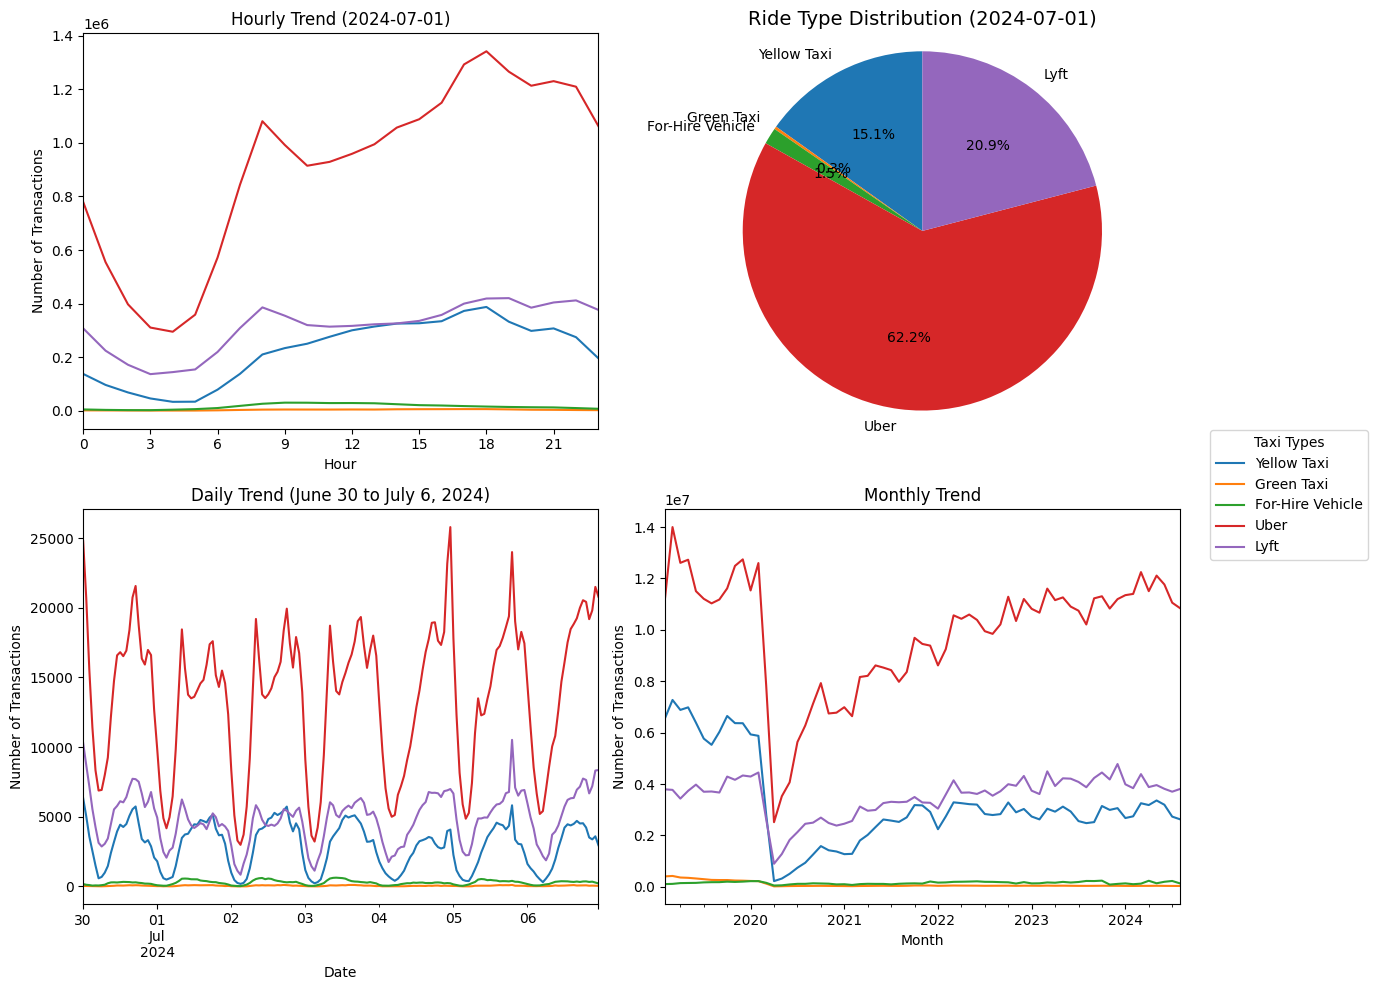

In [18]:
# Hourly transactions
hly_txns = (
    df_man[df_man['txn_date'] >= '2024-07-01']
    [["txn_hour", 'num_txns_Yellow Taxi Trip Records', 
      'num_txns_Green Taxi Trip Records', 
      'num_txns_For-Hire Vehicle Trip Records',
      'num_txns_Uber', 'num_txns_Lyft']]
    .groupby("txn_hour")
    .sum()
)

# Pie Chart
hly_txns_pie = (
    df_man[df_man['txn_date'] >= '2024-07-01']
    [['txn_date', 'num_txns_Yellow Taxi Trip Records', 
      'num_txns_Green Taxi Trip Records', 
      'num_txns_For-Hire Vehicle Trip Records',
      'num_txns_Uber', 'num_txns_Lyft']]
    .groupby("txn_date")
    .sum()
)

# Daily transactions
dly_txns = (
    df_man[(df_man['txn_date'] >= '2024-06-30') & (df_man['txn_date'] <= '2024-07-06')]
    [["txn_date", 'num_txns_Yellow Taxi Trip Records', 
      'num_txns_Green Taxi Trip Records', 
      'num_txns_For-Hire Vehicle Trip Records',
      'num_txns_Uber', 'num_txns_Lyft']]
    .groupby("timestamp_hour")
    .sum()
)

# Monthly transactions
mly_txns = (
    df_man[["txn_month", 'num_txns_Yellow Taxi Trip Records', 
      'num_txns_Green Taxi Trip Records', 
      'num_txns_For-Hire Vehicle Trip Records',
      'num_txns_Uber', 'num_txns_Lyft']]
    .groupby("txn_month")
    .sum()
)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Hourly Trend
axes[0, 0].plot(hly_txns.index, hly_txns.values)
axes[0, 0].set_title("Hourly Trend (2024-07-01)")
axes[0, 0].set_xlim(0, 23)
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel("Number of Transactions")
axes[0, 0].tick_params(axis='x')
axes[0, 0].legend().set_visible(False)  
axes[0, 0].set_xticks(range(0, 24, 3))

# Plot 2: Pie Chart
hly_txns_pie.columns = hly_txns_pie.columns.str.replace('num_txns_', '').str.replace(' Trip Records', '')
txn_sums = hly_txns_pie.iloc[0]
labels = txn_sums.index
sizes = txn_sums.values
axes[0, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Ride Type Distribution (2024-07-01)', fontsize=14)
axes[0, 1].axis('equal')
axes[0, 1].legend().set_visible(False)  

# Plot 3: Daily Trend
dly_txns.plot(ax=axes[1, 0])
axes[1, 0].set_title("Daily Trend (June 30 to July 6, 2024)")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel("Number of Transactions")
axes[1, 0].legend().set_visible(False)  

# Plot 4: Monthly Trend
mly_txns.plot(ax=axes[1, 1])
axes[1, 1].set_title("Monthly Trend")
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel("Number of Transactions")
axes[1, 1].legend().set_visible(False)  

# Create the legend on the figure, positioned at the center-right
fig.legend(
    loc='center right', 
    bbox_to_anchor=(1.15, 0.5), 
    title='Ride Types', 
    labels=["Yellow Taxi", "Green Taxi", "For-Hire Vehicle", "Uber", "Lyft"]
)
# Adjust layout for better spacing
plt.tight_layout()

# Save the image
plt.savefig(rf"../data/images/manhattan_trends.jpeg", dpi=300, bbox_inches='tight')
# Show the plots
plt.show()

### ACF and PACF plots

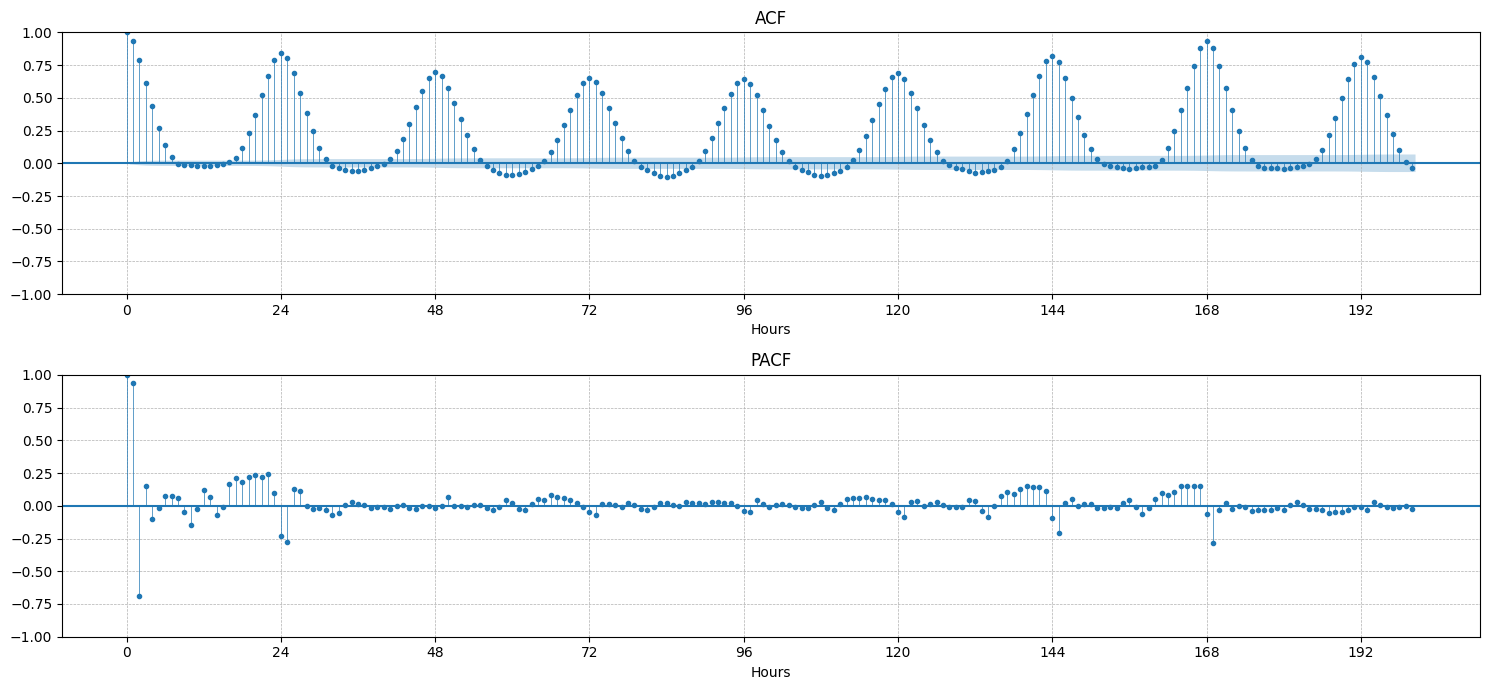

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time series data
time_series = df_man["num_txns_Uber"]

# Max time lag 
lag = 200

# Tick positions
tick_positions = np.arange(0, lag + 1, 24)  # From 0 to max(x) in steps of 24
tick_labels = [int(t) for t in tick_positions]  # Custom labels

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

# Autocorrelation (ACF)
plot_acf(
    time_series,
    ax=ax[0],
    lags=lag,
    vlines_kwargs={"linewidth": 0.5},  # Adjust line width
    markersize=3  # Adjust marker size
)
ax[0].set_title("ACF")
ax[0].set_xlabel("Hours")
ax[0].set_xticks(tick_positions)  # Set tick positions
ax[0].set_xticklabels(tick_labels)  # Set custom labels
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

# Partial Autocorrelation (PACF)
plot_pacf(
    time_series,
    ax=ax[1],
    lags=lag,
    method='ywm',
    vlines_kwargs={"linewidth": 0.5},  # Adjust line width
    markersize=3  # Adjust marker size
)
ax[1].set_title("PACF")
ax[1].set_xlabel("Hours")
ax[1].set_xticks(tick_positions)  # Set tick positions
ax[1].set_xticklabels(tick_labels)  # Set custom labels
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

fig.tight_layout()
plt.savefig("../data/images/acf_pacf_manhattan.jpeg", dpi=300)
plt.show()

# Test of stationarity

In [20]:
from statsmodels.tsa.stattools import adfuller

time_series = df_man[(df_man['txn_date'] >= '2023-01-01') & (df_man['txn_date'] <= '2024-12-01')]["num_txns_Uber"].to_numpy()
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -15.571445380785987
p-value: 1.9843702608872489e-28


Time series is stationary.

# Fourier Transform to determine the most dominant frequencies

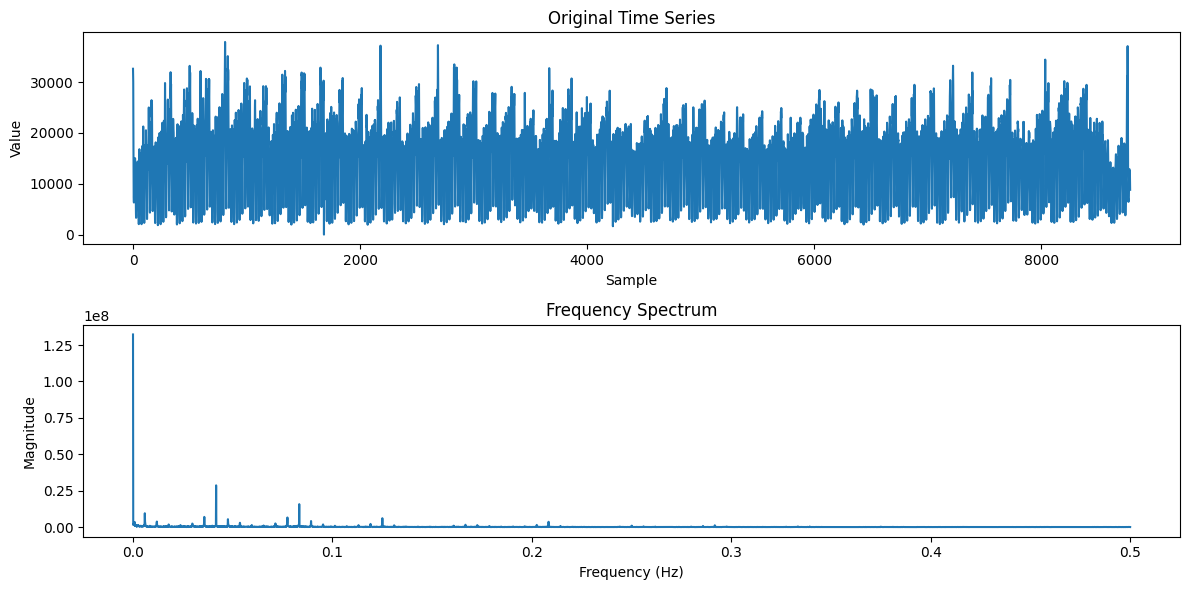

In [21]:
def analyze_frequency(time_series, sampling_rate):
    """
    Analyze frequency components of a time series
    
    Parameters:
    - time_series: numpy array of time series data
    - sampling_rate: sampling frequency in Hz
    
    Returns:
    - Dominant frequencies and their magnitudes
    """
    # Perform Fast Fourier Transform
    fft_result = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(time_series), 1/sampling_rate)
    
    # Get positive frequencies
    positive_freq_mask = frequencies >= 0
    positive_frequencies = frequencies[positive_freq_mask]
    positive_magnitudes = np.abs(fft_result[positive_freq_mask])
    
    # Find top 3 dominant frequencies
    top_indices = np.argsort(positive_magnitudes)[::-1][:40]
    dominant_frequencies = positive_frequencies[top_indices]
    dominant_magnitudes = positive_magnitudes[top_indices]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Original Time Series
    plt.subplot(2, 1, 1)
    plt.plot(time_series)
    plt.title('Original Time Series')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    
    # Frequency Spectrum
    plt.subplot(2, 1, 2)
    plt.plot(positive_frequencies, positive_magnitudes)
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()
    
    # Print dominant frequencies
    # print("Dominant Frequencies:")
    # for freq, mag in zip(dominant_frequencies, dominant_magnitudes):
    #     print(f"Frequency: {freq:.20f} Hz, Magnitude: {mag:.20f}")
    
    return dominant_frequencies, dominant_magnitudes


sampling_rate = 1 #/3600  
time_series = df_man[(df_man['txn_date'] >= '2023-01-01') & (df_man['txn_date'] <= '2024-01-01')]["num_txns_Uber"].to_numpy()
dominant_frequencies, dominant_magnitudes = analyze_frequency(time_series, sampling_rate)

In [22]:
period_hours = sorted(1 / (dominant_frequencies)  )
period_hours

C:\Users\tonba\AppData\Local\Temp\ipykernel_27340\1222271090.py:1: RuntimeWarning: divide by zero encountered in divide
  period_hours = sorted(1 / (dominant_frequencies)  )


[4.8,
 6.0,
 8.0,
 8.397705544933078,
 10.49462365591398,
 11.204081632653061,
 12.0,
 12.898678414096915,
 12.91764705882353,
 12.936671575846834,
 12.95575221238938,
 13.987261146496815,
 14.009569377990431,
 18.64968152866242,
 18.68936170212766,
 20.914285714285715,
 20.96420047732697,
 21.014354066985646,
 21.06474820143885,
 24.0,
 27.885714285714286,
 27.97452229299363,
 28.063897763578275,
 28.153846153846157,
 33.52671755725191,
 33.6551724137931,
 55.94904458598726,
 82.86792452830188,
 83.65714285714286,
 84.46153846153845,
 85.28155339805825,
 162.66666666666666,
 165.73584905660377,
 168.9230769230769,
 172.23529411764704,
 1098.0,
 1756.7999999999997,
 2928.0,
 4392.0,
 inf]

### Time Series Decomposition

Might be difficult to do since the data has daily and weekly seasonality.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# STL decomposition
result = seasonal_decompose(time_series, model='additive', period=24)  

# Plot the decomposition
result.plot()
plt.show()

### Geopandas plots (Heatmaps)